# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
in this Project will be analysing 10,000 movies and we interested to look how can the data be used to find a way to increase revenues for producers in the future.


### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
>Q1: What genres of movies have the most revenue and how much are their budgets?

>Q2: Does the vote affect the revenue of the movies?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
df = pd.read_csv("tmdb-movies.csv")
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
df.shape

(10866, 21)

as we see the data have 21 columns and 10866 row 

In [4]:
df.duplicated().sum()

1

here we dscover the doblicate of rows 
in here there is one row duplicate

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


.If we look we can see that there are movies that have 0 budget and revenue and this will make some mistakes in the analyze
  

when we see the mean of reveune after inflation is 5.136436e+07 and This means that movies generate five times more revenue than spending, which is approximately 1.755104e+07 after inflation.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

evry columns have the suitable type of data

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

here we can find the miss values in some columns


### Data Cleaning

 

In [8]:
df.drop(['cast','homepage','director','tagline','keywords','overview','runtime','production_companies'],axis=1,inplace=True)

Drop the unnecessary columns

In [9]:
# drop rows with any null values in datasets
df.dropna(inplace =True)

drop rows with any null values in datasets

In [10]:
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [11]:
# drop rows with any duplicate values in datasets
df.drop_duplicates(inplace= True)

drop rows with any duplicate values in datasets

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 13 columns):
id                10834 non-null int64
imdb_id           10834 non-null object
popularity        10834 non-null float64
budget            10834 non-null int64
revenue           10834 non-null int64
original_title    10834 non-null object
genres            10834 non-null object
release_date      10834 non-null object
vote_count        10834 non-null int64
vote_average      10834 non-null float64
release_year      10834 non-null int64
budget_adj        10834 non-null float64
revenue_adj       10834 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


here we have 10834 rows afte drop unnecessary columns and duplicate and miss values  rows and 13 columns

In [13]:
#Take all rows that contain |  in genres column
hb = df[df['genres'].str.contains('|',regex=False)]

In [14]:
#create 6 copies of the data
df1 = hb.copy()

In [15]:
df2 = hb.copy()

In [16]:
df3 = hb.copy() 

In [17]:
df4 = hb.copy()

In [18]:
df5 = hb.copy() 

In [19]:
df6 = hb.copy()

In [20]:
#  split by "|"
df1["genres"] = df1["genres"].apply(lambda x: x.split("|")[0] )


In [21]:
df2["genres"] = df2["genres"].apply(lambda x: x.split("|")[1] )

In [22]:
df3["genres"] = df3["genres"].apply(lambda x: x.split("|")[2] if len(x.split("|"))==3 or len(x.split("|")) == 4 else  np.nan )

In [23]:
df4["genres"] = df4["genres"].apply(lambda x: x.split("|")[3] if len(x.split("|"))==4 or len(x.split("|"))==5  else  np.nan )

In [24]:
df5["genres"] = df5["genres"].apply(lambda x: x.split("|")[4] if len(x.split("|"))==5 or len(x.split("|"))==6 else  np.nan )

In [25]:
df6["genres"] = df6["genres"].apply(lambda x: x.split("|")[5] if len(x.split("|"))==6 or len(x.split("|"))==7 else  np.nan )

In [26]:
def Append():
    new_rows = df1.append(df2)
    new_rows =new_rows.append(df3)
    new_rows =new_rows.append(df4)
    new_rows =new_rows.append(df5)
    new_rows =new_rows.append(df6)
    return new_rows

In [27]:
#combine dataframes to add to the original dataframe
new_rows=Append()

In [28]:
new_rows.shape

(51048, 13)

here we split the genres column to make every cell have one genre of movie 

for that we can see the number of rows are increased to 51048

In [29]:
# drop rows with any null values in new_rows dataframe
new_rows.dropna(inplace = True)

In [30]:
new_rows.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [31]:
# drop the original hybrid rows
df.drop(hb.index, inplace=True)



In [32]:
# add in our newly separated rows
df = df.append(new_rows,ignore_index=True)

In [33]:
df.shape

(26393, 13)

to be shur all cell in the genres columns have value I droped all miss values 

and that made number of rows are decreased to 26393

In [34]:
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26393.000000,26393.000000,2.639300e+04,2.639300e+04,26393.000000,26393.000000,26393.000000,2.639300e+04,2.639300e+04
mean,59157.256394,0.704691,1.731310e+07,4.701482e+07,249.157087,5.957064,2000.739590,2.079161e+07,6.039345e+07
std,87136.833623,1.118308,3.436044e+07,1.318669e+08,637.048646,0.912233,12.765996,3.792356e+07,1.612178e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10212.000000,0.223951,0.000000e+00,0.000000e+00,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18256.000000,0.409718,3.000000e+01,0.000000e+00,43.000000,6.000000,2005.000000,5.006696e+01,0.000000e+00
75%,59408.000000,0.773316,2.000000e+07,3.022998e+07,172.000000,6.600000,2011.000000,2.646037e+07,4.317337e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


here we see 25% in budget_adj and revenue_adj are 0 and I think that will give wrong answers of Question

In [35]:
zero_Br = df.query('budget_adj == 0 or revenue_adj == 0') 


In [36]:
df.drop(zero_Br.index, inplace =True)

In [37]:
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10044.000000,10044.000000,1.004400e+04,1.004400e+04,10044.000000,10044.000000,10044.000000,1.004400e+04,1.004400e+04
mean,36561.781760,1.262606,4.131958e+07,1.190542e+08,574.296794,6.160135,2000.946137,4.912799e+07,1.510813e+08
std,63347.265997,1.616836,4.512556e+07,1.923764e+08,940.786307,0.789782,11.290150,4.746881e+07,2.326529e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5470.000000,0.476982,1.100000e+07,1.479362e+07,76.000000,5.700000,1995.000000,1.519591e+07,2.027166e+07
50%,11042.500000,0.840892,2.500000e+07,5.006831e+07,225.000000,6.200000,2004.000000,3.392893e+07,6.782098e+07
75%,35080.000000,1.457226,5.600000e+07,1.403966e+08,628.000000,6.700000,2010.000000,6.926672e+07,1.820694e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


here I dropped all rows that have zeros in budget_adj and revenue_adj to be sure they don't make any wrong analyze

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10044 entries, 0 to 26389
Data columns (total 13 columns):
id                10044 non-null int64
imdb_id           10044 non-null object
popularity        10044 non-null float64
budget            10044 non-null int64
revenue           10044 non-null int64
original_title    10044 non-null object
genres            10044 non-null object
release_date      10044 non-null object
vote_count        10044 non-null int64
vote_average      10044 non-null float64
release_year      10044 non-null int64
budget_adj        10044 non-null float64
revenue_adj       10044 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis
Now,that we have trimmed and cleaned data, ready to move on to exploration.


### Question 1 ( What genres of movies have the most revenue and how much are their budgets?)

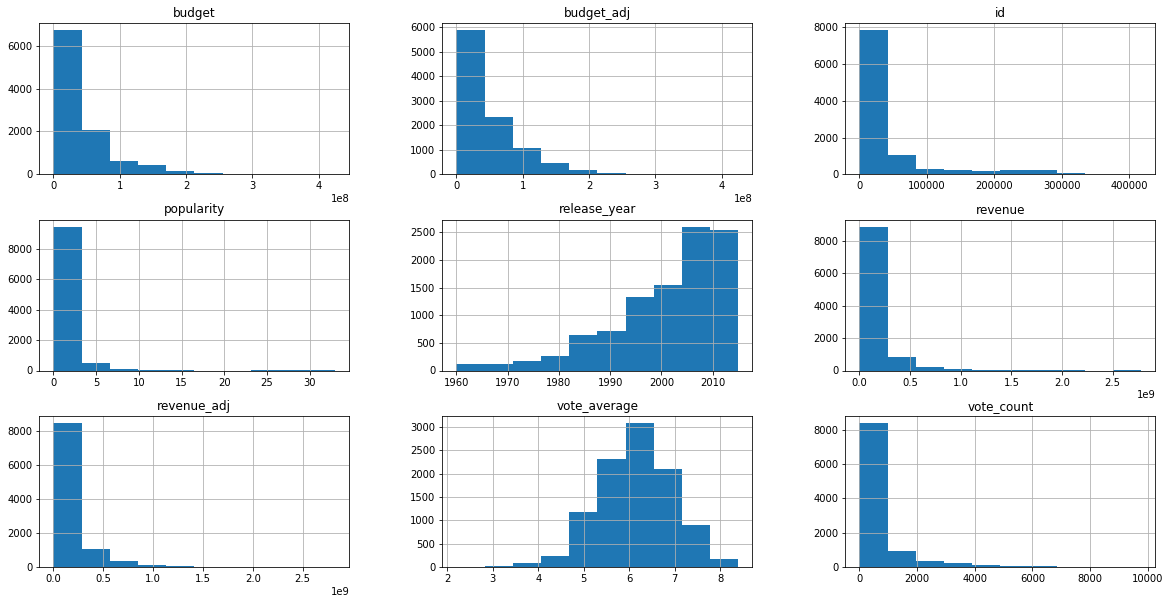

In [39]:
df.hist(figsize=(20,10));


In [40]:
vote_per=df.groupby(['genres'])["vote_average"].mean()



In [41]:
genres = df.genres.unique()

we need genres to analysis the data and I droped all duplicate  in genres columns to get genres 

In [42]:
def creat_bar(df):
    plt.figure(figsize=(20,10))
    df.groupby(['genres'])["revenue_adj"].mean().plot(kind= 'bar ',color="blue",label="Revenue")
    df.groupby(['genres'])["budget_adj"].mean().plot(kind= 'bar ',color="red",label="Budget")
    plt.legend(fontsize=15);
    plt.title("Comparing revenue between genres of movies and their budgets",fontsize=20)
    plt.xlabel("genres movies ",fontsize=15)
    plt.ylabel("revenue and budgets ",fontsize=15);
    plt.grid()

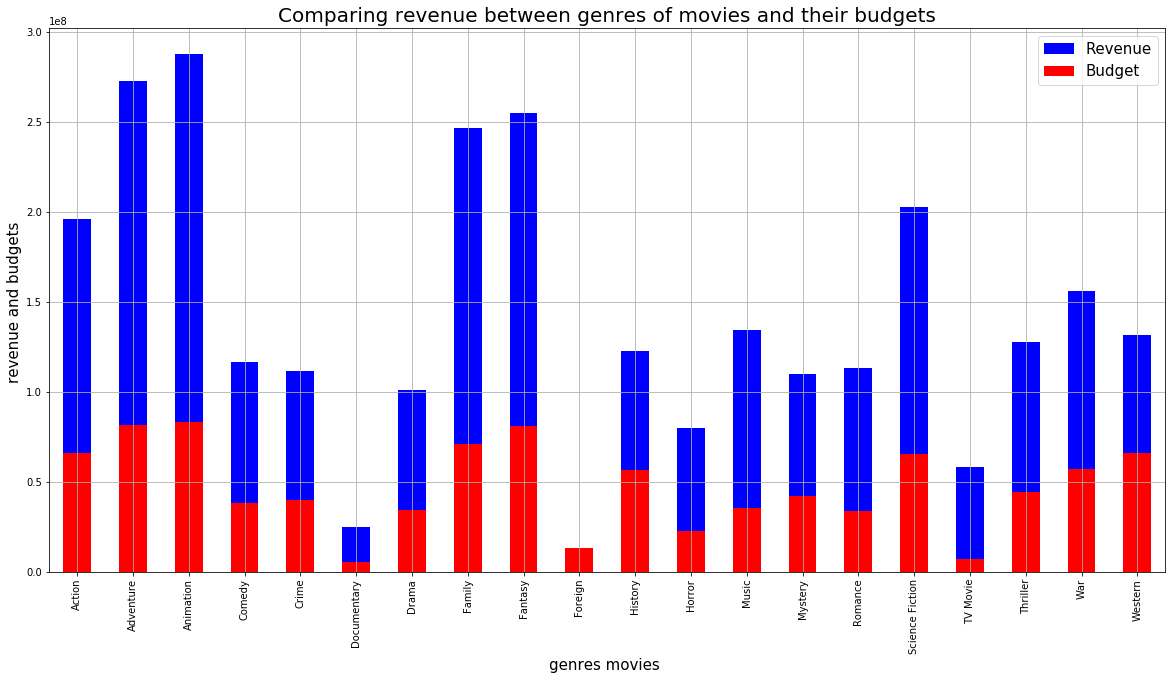

In [43]:
creat_bar(df)

here when we can see the bar chart digrame and we get the Animation make the highest 

but the budget of Animation is almost the same of budget Adventure

In [44]:
def show_mean(df):
    print("\n-------------revenue------------")
    print(df.groupby(['genres'])["revenue_adj"].mean())
    print("\n\n-------------budget--------------")
    print(df.groupby(['genres'])["budget_adj"].mean())


In [45]:
show_mean(df)


-------------revenue------------
genres
Action             1.961746e+08
Adventure          2.730314e+08
Animation          2.879085e+08
Comedy             1.164754e+08
Crime              1.118165e+08
Documentary        2.480617e+07
Drama              1.008531e+08
Family             2.468554e+08
Fantasy            2.550499e+08
Foreign            7.380611e+06
History            1.224427e+08
Horror             8.001215e+07
Music              1.345660e+08
Mystery            1.100693e+08
Romance            1.134956e+08
Science Fiction    2.030076e+08
TV Movie           5.838910e+07
Thriller           1.278037e+08
War                1.558981e+08
Western            1.317702e+08
Name: revenue_adj, dtype: float64


-------------budget--------------
genres
Action             6.589700e+07
Adventure          8.138690e+07
Animation          8.326614e+07
Comedy             3.793538e+07
Crime              3.991105e+07
Documentary        5.379702e+06
Drama              3.417262e+07
Family            

here we can see the revenue and budget mean for evrey genres

### Research Question 2  (Does the vote affect the revenue of the movies?)

In [46]:
vote_per=df.groupby(['genres'])["vote_average"].mean()


In [47]:
revenue_per=df.groupby(['genres'])["revenue_adj"].mean()

I made variable mean for vote and for revenue in every genre of movies

In [48]:
def setName(genres,vote_per,revenue_per):
    for i, txt in enumerate(genres.tolist()):
        if(i%2 == 0 and txt != 'Mystery' and txt !="Crime" and txt != 'Romance' and txt != 'Action' and txt != 'Family'):
            plt.annotate(txt, (vote_per[txt], revenue_per[txt]) ,fontsize=15,textcoords="offset points",xytext=(1,10),ha='left')
            pass
        elif(txt == 'Mystery'):
 
            plt.annotate(txt, (vote_per[txt], revenue_per[txt]) ,fontsize=15,textcoords="offset points",xytext=(0,10),ha='center')
        elif(txt == 'Crime'):
            plt.annotate(txt, (vote_per[txt], revenue_per[txt]) ,fontsize=15,textcoords="offset points",xytext=(0,-15),ha='left')
        elif(txt == 'Romance'):
            plt.annotate(txt, (vote_per[txt], revenue_per[txt]) ,fontsize=15,textcoords="offset points",xytext=(0,-25),ha='left') 
        elif(txt == 'Action'):
            plt.annotate(txt, (vote_per[txt], revenue_per[txt]) ,fontsize=15,textcoords="offset points",xytext=(0,-15),ha='left')
        elif(txt == 'Family'):
            plt.annotate(txt, (vote_per[txt], revenue_per[txt]) ,fontsize=15,textcoords="offset points",xytext=(0,-15),ha='left')

        else:
            plt.annotate(txt, (vote_per[txt], revenue_per[txt]) ,fontsize=15,textcoords="offset points",xytext=(-10,-10),ha='right')

In [49]:
def creat_chart(vote_per,revenue_per):
    plt.figure(figsize=(20,10))
    u=plt.scatter(vote_per, revenue_per,s=30,color='red')
    plt.title(" vote affected to revenue of the movies",fontsize=20)
    plt.xlabel("vote ",fontsize=15)
    plt.ylabel("revenues",fontsize=15);
    plt.grid()
    

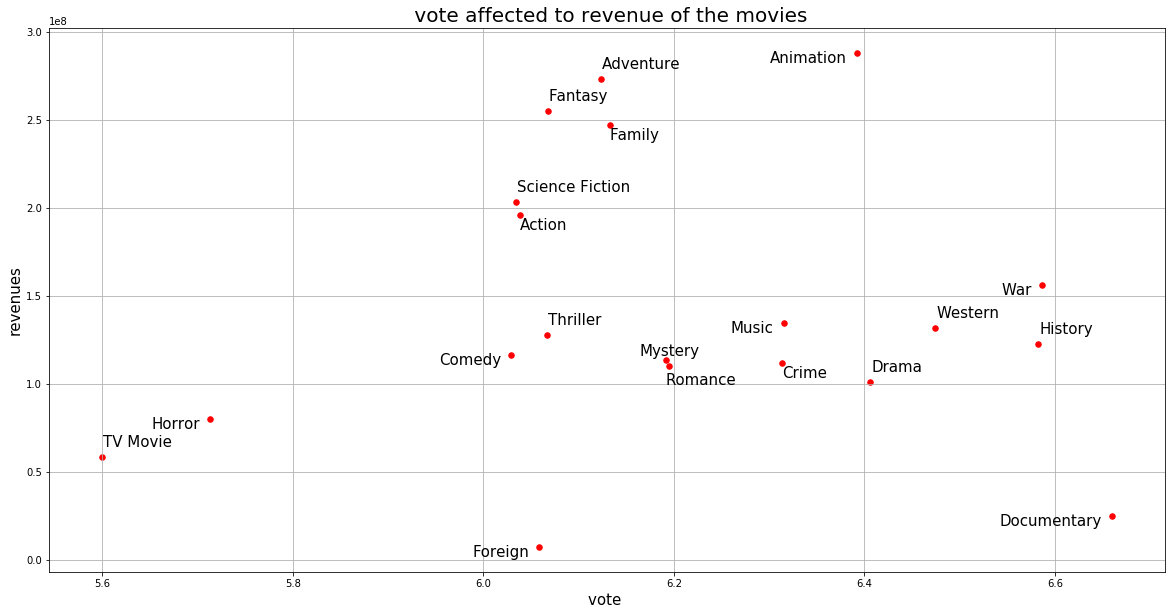

In [50]:
creat_chart(vote_per,revenue_per),setName(genres,vote_per,revenue_per);

here can see the scatter chart digrame be the revenues as xlabe and vote as ylabe 

as we can see the vote doesn't have a big effect on the revenue because Documentary has the highest vote but doesn't have high revenue

and the TV Movie has Lowest Vote but has more revenue than Documentary


<a id='conclusions'></a>
## Conclusions

most of genres movies have revenue between 1*10^8 and  2.5*10^8

Animation has highest revenue and budget form 1960 to 2015


most of genres movies have vote between 6 and 6.5 

Documentary has highest vote form 1960 to 2015

the vote doesn't has big effect to revenue 


## Limitations 
The data is so small and that make drop is hard because I was wanting to save large data as much possible
There is many null values in the data and also that make it hard to data 

In [86]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0